Importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\medical_cost_insurance.csv")

Exploratory Data Analysis

1. Non Graphical Analysis

In [3]:
# Printing the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Printing the last 5 rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The .info() function tells us, that there are no Null values in the dataset. We have a total of 1338 rows and 7 Columns. 2 columns are int type, 2 are float type and 3 are object type.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Exploratory Data Analysis

2. Graphical Analysis

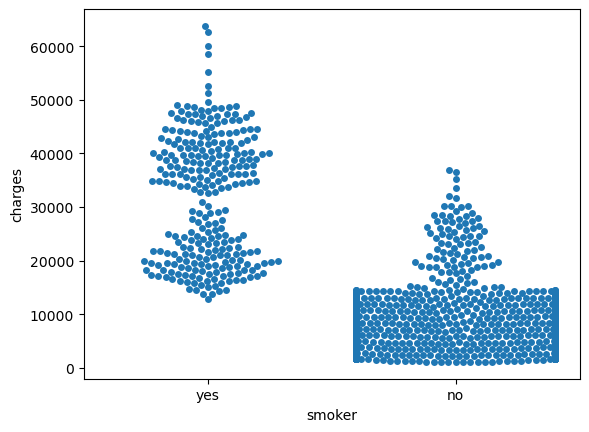

In [7]:
# Creating a swarmplot to plot the categorical data with continous data
sns.swarmplot(x='smoker',y='charges',data=df)
plt.show()

The above swarmplot shows that the people who smoke have to pay more compared to the people who does not smoke.

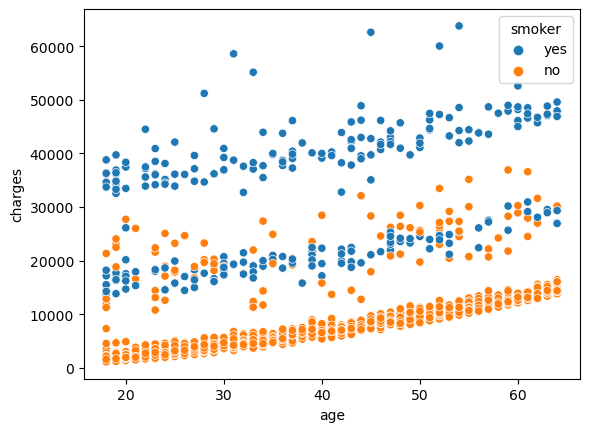

In [12]:
# Using a scatterplot to compare 2 continous features (age & charges) with 1 categorical feature(smoker)
sns.scatterplot(x='age',y='charges',hue='smoker',data=df)
plt.show()

The above scatterplot shows us that as the age increases the price of the medical insurance also increases and if the person is a smoker as well the prices go even higher for them as compared to similar age categories who does not smoke.

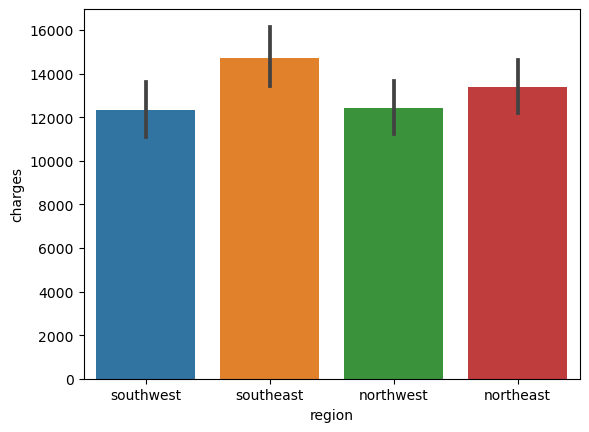

In [14]:
# Creating a barplot to compare the region wise prices for the insurance
sns.barplot(x='region',y='charges',data=df)
plt.show()

The barplot tell us that southeast region has the highest price range followed by northeast while southwest and northwest both have the similiar price range.

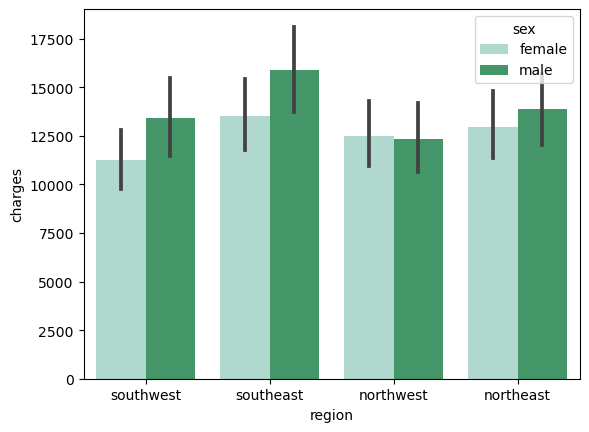

In [15]:
# Compraing Region wise price charges w.r.t age.
sns.barplot(x='region',y='charges',hue='sex',data=df,palette='BuGn')
plt.show()

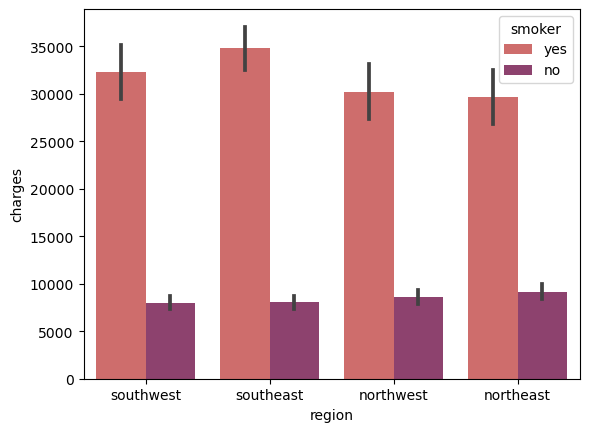

In [16]:
# Creating a graph that comapres the region wise price charges w.r.t if the person smokes or not.
sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='flare')
plt.show()

There is a considerable difference between the people who smokes in ever region.

Data Preprocessing

Converting object labels into categorical

In [17]:
df[['sex','smoker','region']] = df[['sex','smoker','region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
l_e = LabelEncoder()

l_e.fit(df.sex.drop_duplicates())
df.sex = l_e.transform(df.sex)
l_e.fit(df.smoker.drop_duplicates())
df.smoker = l_e.transform(df.smoker)
l_e.fit(df.region.drop_duplicates())
df.region = l_e.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,3,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,2,1725.55230
2,28,2,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,2,36.85,0,0,2,1629.8335
1336,21,3,25.80,0,0,3,2007.9450
1337,61,1,29.07,0,1,1,29141.3603


Correlation Matrix 

 Creating a Correlation Matrix to check the relation of features.

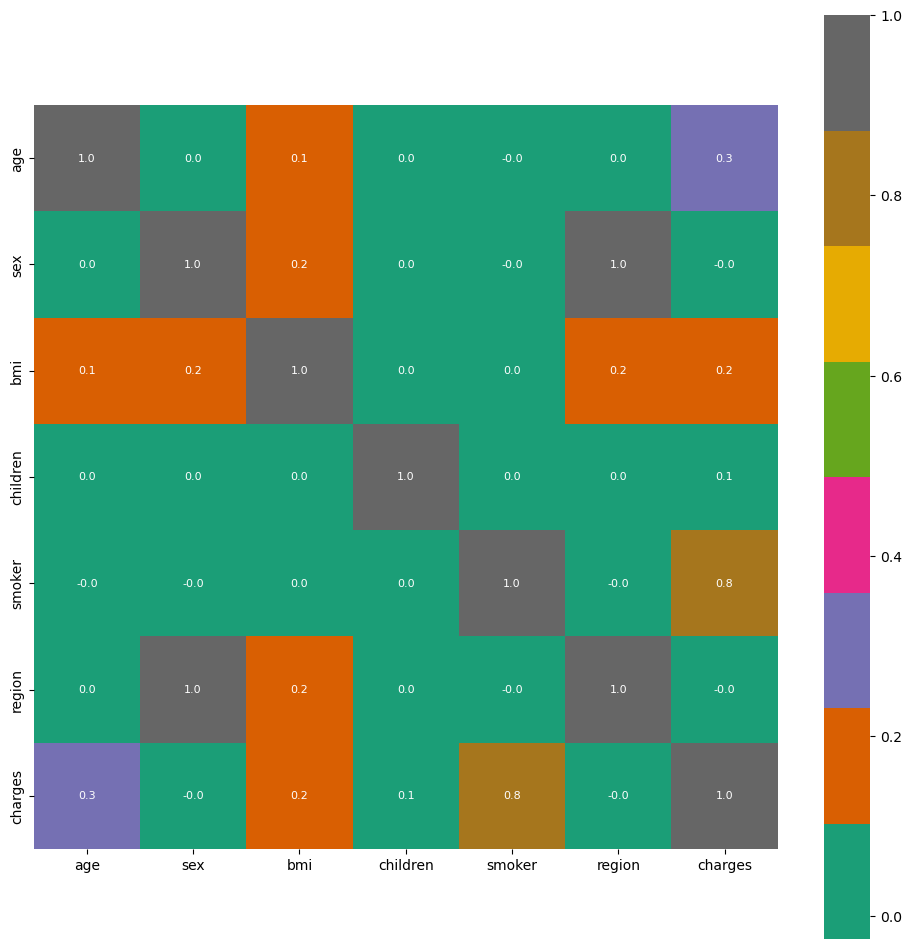

In [22]:
f,axs=plt.subplots(1,1,figsize=(12,12))
sns.heatmap(df.corr(),annot=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Dark2')
plt.show()

No correlation, except with smoking.

Creating the Model

Random Forest Regressor

In [24]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

Splitting the data into test and train

In [30]:
x = np.array(df.iloc[:,:-1]) #Indipendent features
y = np.array(df.iloc[:,-1]) #Dependent Feature

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [49]:
x.shape,y.shape

((1338, 6), (1338,))

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [51]:
model = RandomForestRegressor(n_estimators=10,random_state=100)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=100)

In [52]:
accuracy = model.score(x_test,y_test)
print("Accuracy : ",accuracy)

Accuracy :  0.8350171324300553


Random Forest Regressor algorithm gives us an accuracy of 83% 

Let us try another algorithm 

Multiple Linear Regression :- used to predict the relationship between the dependent variable and the independent variable i.e finding the best fit linear line between the dependent and the independent features.

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [57]:
x_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print("Accuracy : ",accuracy)

Accuracy :  0.794274634606689


Linear Regression gives us an accuracy of 79%. 

Comparing the two models tells us that Random Forest gives us a better accuracy. 